In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [18]:
data = pd.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
def ols_cost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [19]:
def gradientDescent(X, y, theta, alpha, iters):
    
    # Define the temp matrix for theta
    temp = np.matrix(np.zeros(theta.shape))
    
    # Number of parameters to iterate through
    parameters = int(theta.ravel().shape[1])
    
    # cost vector to see how it progresses through each step
    cost = np.zeros(iters + 1)
    cost[0] = ols_cost(X, y, theta)
    
    # Calculate the error at each step
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i + 1] = ols_cost(X, y, theta)
        
    return theta, cost

In [20]:
alpha = 0.01
iters = 1000
sigma = data.std()
mu = data.mean()

X = pd.DataFrame(data['alcohol'])
X['x_0'] = 1
y = data['quality']
X = np.matrix(X.values)
y = np.matrix(y.values).T
theta = np.matrix(np.zeros(shape=[1,X.shape[1]]))


In [21]:
ols_cost(X, y, theta)

16.20825515947467

In [22]:
theta_final, cost = gradientDescent(X, y, theta, alpha, iters)
ols_cost(X, y, theta_final)


0.2660076719790539

In [23]:
x = np.linspace(data.alcohol.min(), data.alcohol.max(), 100)
y_hat = theta_final[0,1] + theta_final[0,0] * x 

In [24]:
data_z = (data - data.mean()) / data.std()
sigma = data.std()
mu = data.mean()

In [25]:
# Add the x_0 value
data_z['x_0'] = 1

X = data_z.drop(['quality'], axis=1)
y = data_z['quality']

X = np.matrix(X.values)
y = np.matrix(y.values).T
theta = np.matrix(np.zeros(shape=[1,X.shape[1]]))

In [26]:
theta_final, cost = gradientDescent(X, y, theta, alpha, iters)
ols_cost(X, y, theta_final)
x_hat_z = np.ones((100, X.shape[1]))
for i in range(1, x_hat_z.shape[1]):
    x_hat_z[:,i] = np.linspace(X[:,i].min(), X[:,i].max(), 100)

# y_hat_z is the normalized, predicted values.
y_hat_z = x_hat_z * theta_final.T

In [12]:
y_hat = y_hat_z * sigma[len(sigma) - 1] + mu[len(mu) - 1]
x_hat = x_hat_z
# First column is intercepts
x_hat[:,0:(len(sigma) - 1)] = x_hat_z[:,0:(len(
            sigma) - 1)] * np.atleast_2d(sigma[0:(
            len(sigma) - 1)]) + np.atleast_2d(mu[0:(
            len(sigma) - 1)])

In [13]:
# Use training data to calculate R-squared
y_hat_2 = np.ravel(X * theta_final.T * sigma[len(sigma) - 1] + mu[len(mu) - 1])
num = np.sum((data.quality - y_hat_2) ** 2)
den = np.sum((data.quality - data.quality.mean()) ** 2)
r_squared = 1 - num / den
r_squared

0.36035795138073934

In [14]:
from sklearn.linear_model import LinearRegression


In [15]:
X = data.drop(['quality'], axis=1)
y = data['quality']
lm = LinearRegression(fit_intercept=True, normalize=True)
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [16]:
X_ = np.matrix(X.values)
x_hat_sk = np.zeros((100, X.shape[1]))
for i in range(X.shape[1]):
    x_hat_sk[:,i] = np.linspace(X_[:,i].min(), X_[:,i].max(), 100)
y_hat_sk = lm.predict(x_hat_sk)

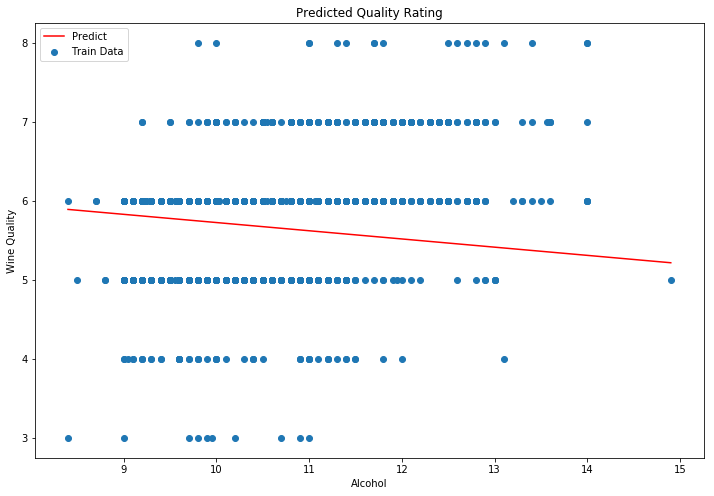

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, y_hat, 'r', label='Predict')
ax.scatter(data.alcohol, data.quality, label='Train Data')
ax.legend(loc=2)
ax.set_xlabel('Alcohol')
ax.set_ylabel('Wine Quality')
ax.set_title('Predicted Quality Rating')
plt.show()